<a href="https://colab.research.google.com/github/dresvyankina/dz/blob/main/dz_%22HW_lessons_9_10_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

Ноутбук в колаб: https://colab.research.google.com/drive/1d-vvpJW8IWSPeodFnfaEVaZIQrys8uU0?usp=sharing

**Дедлайн: 01.01.2021, 23:59**


Формат отчетности - jupyter notebook. Однако вычислять производные не обязательно в Markdown. Если вычисляете вручную, то дополнительно с ноутбуком, отправляйте pdf-файл с расписанным решением.

### Пример реализации градиентного спуска: https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_9/gradient_methods.ipynb

# Задания

Перед выполнением ДЗ посмотрите на ноутбук, прикрепленный по ссылке выше. Там вы найдете реализацию градиентного спуска с постоянным и дробным шагом.

### Задание 1. [1 point]

Релизуйте градиентный спуск с постоянным шагом и с дробным шагом для функции
$$
y = x_{1}^{2}+5 x_{2}^{2}
$$

в произвольно выбранной Вами точке.

Поэксперементируйте с разными значениями шага (скорости обучения), попробуйте хотя бы по 2-3 разных значения.

### Задание 2. [3 points]

Для функции из предыдущего задания реализуйте градиентный спуск, в котором значение шага (скорости обучения) будет изменяться по формуле циклического косинусного ожига. ( в англ. литературе - cosine annealing learning rate или cosine decay lr). 

Доп. литература:
- Циклический косинусный отжиг https://habr.com/ru/post/332534/

- Пример colise decay в библиотеке Pytorch:
https://www.programmersought.com/article/12164650026/

### Задание 3. [0.75 point]
Проверьте работу Вашего градиентного спуска с косинусным отжигом на произвольной функции ( полином должен быть не меньше 3-ьего порядка и задан в пространстве не меньше $R^3$).

### Задание 4.
Дана следующая плотность вероятности для случайной величины Х:
$$
f(x)=\left\{\begin{array}{r}
0 \text { npu } x \leq \pi \\
-\cos x \text { npu } \pi<x \leq \frac{3}{2} \pi \\
\text { 0 npu } x>\frac{3}{2} \pi
\end{array}\right.
$$

1. Постройте график данной плотности вероятности **[0.25 point]**

2. Определить вероятность попадания случайной величины X в интервал $\left[\pi, \frac{5}{4} \pi\right]$ **[0.75 point]**

3. Найти математическое ожидание и дисперсию случайной величины X . **[0.75 point]**

Так как мы не проходили интегрирование, то в 2 и 3 пунктах можете использовать
wolfram alpha (https://www.wolframalpha.com) для интегрирования. 

### Задание 5 [1.5 point]

 Случайная величина Х задана функцией распределения F(x).

 $$F(x)=\left\{\begin{array}{c}0, x \leq 1 \\ x-1,1<x \leq 2 \\ 1, x>2\end{array}\right.$$

 1. Является ли случайная величина Х непрерывной?

 2. имеет ли случайная величина Х плотность вероятности f(X)? Если имеет, найти ее. 
 3. постройте графики f(X) и F(X), если такое возможно.


### Задание 6

Рассмотрим несбалансированный набор данных с соотношением меньшего класса к большему 1: 100, где 100 экземпляров принадлежит меньшему классу, а 10 000 большему.

Модель ML делает прогнозы и предсказывает 120 примеров как принадлежащих к классу меньшинства, 90 из которых верны, а 30 - неверны.

Найти:

- Precision **[0.5 point]**
- Recall **[0.5 point]**
- $F_1$ метрику **[0.5 point]**

In [1]:
import numpy as np

In [2]:
def f(x):
    return x[0]**2+5*x[1]**2
    
def grad_f(x):
    return np.array([2*x[0], 10*x[1]])

In [ ]:
#Градиентный спуск с постоянным шагом
def grad_descent_const_step(x = np.array([1, 1]), alpha = 0.1, epsilon = 0.05):
    grad = grad_f(x)
    n = 0
    check = 0
    while (np.linalg.norm(grad) > epsilon) or (check < 3):
        x = x - alpha*grad
        grad = grad_f(x)
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    print("Градиентный спуст с постоянным шагом выполнил {} шагов".format(n))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

In [ ]:
x = grad_descent_const_step(alpha = 0.15)

Градиентный спуст с постоянным шагом выполнил 13 шагов
Точка с координатами х1 = 0.009688901040700002, x2 = -0.0001220703125


In [ ]:
x = grad_descent_const_step(alpha = 0.001)

Градиентный спуст с постоянным шагом выполнил 1845 шагов
Точка с координатами х1 = 0.024879902563127755, x2 = 8.849811746717511e-09


In [ ]:
x = grad_descent_const_step(alpha = 0.0001)

Градиентный спуст с постоянным шагом выполнил 18445 шагов
Точка с координатами х1 = 0.024987765617576436, x2 = 9.670085817114161e-09


In [ ]:
#Градиентный спуск с дроблением шага
def grad_descent_step_splitting(x = np.array([1, 1]), alpha = 1, epsilon = 0.05, ksi = 0.5, lambda_d = 0.35):
    grad = grad_f(x)
    n = 0
    n_alpha = 0
    alpha_k = alpha
    x_k0 = x
    check = 0
    while np.linalg.norm(grad) > epsilon or check < 3:
        grad = grad_f(x_k0)
        x_k1 = x_k0 - alpha_k*grad
        while f(x_k1) - f(x_k0) > - alpha_k * ksi * (np.linalg.norm(grad)**2):
            alpha_k *= lambda_d
            x_k1 = x_k0 - alpha_k*grad
            n_alpha+=1
        x_k0 = x_k0 - alpha_k*grad
        alpha_k = alpha
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    x = x_k0
    print("Градиентный спуст с дроблением шага выполнил {} шагов".format(n))
    print("Выполнено {} итераций дробления шага".format(n_alpha))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

In [ ]:

a = grad_descent_step_splitting()

Градиентный спуст с дроблением шага выполнил 13 шагов
Выполнено 27 итераций дробления шага
Точка с координатами х1 = 0.0034938588036157476, x2 = -0.000215883766723314


In [ ]:
def grad_descent_step_splitting(x = np.array([1, 1]), alpha = 0.1, epsilon = 0.05, ksi = 0.5, lambda_d = 0.35):
    grad = grad_f(x)
    n = 0
    n_alpha = 0
    alpha_k = alpha
    x_k0 = x
    check = 0
    while np.linalg.norm(grad) > epsilon or check < 3:
        grad = grad_f(x_k0)
        x_k1 = x_k0 - alpha_k*grad
        while f(x_k1) - f(x_k0) > - alpha_k * ksi * (np.linalg.norm(grad)**2):
            alpha_k *= lambda_d
            x_k1 = x_k0 - alpha_k*grad
            n_alpha+=1
        x_k0 = x_k0 - alpha_k*grad
        alpha_k = alpha
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    x = x_k0
    print("Градиентный спуст с дроблением шага выполнил {} шагов".format(n))
    print("Выполнено {} итераций дробления шага".format(n_alpha))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

In [ ]:
a = grad_descent_step_splitting()

Градиентный спуст с дроблением шага выполнил 20 шагов
Выполнено 0 итераций дробления шага
Точка с координатами х1 = 0.01152921504606847, x2 = 0.0


In [ ]:
def grad_descent_step_splitting(x = np.array([1, 1]), alpha = 0.015, epsilon = 0.05, ksi = 0.5, lambda_d = 0.35):
    grad = grad_f(x)
    n = 0
    n_alpha = 0
    alpha_k = alpha
    x_k0 = x
    check = 0
    while np.linalg.norm(grad) > epsilon or check < 3:
        grad = grad_f(x_k0)
        x_k1 = x_k0 - alpha_k*grad
        while f(x_k1) - f(x_k0) > - alpha_k * ksi * (np.linalg.norm(grad)**2):
            alpha_k *= lambda_d
            x_k1 = x_k0 - alpha_k*grad
            n_alpha+=1
        x_k0 = x_k0 - alpha_k*grad
        alpha_k = alpha
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    x = x_k0
    print("Градиентный спуст с дроблением шага выполнил {} шагов".format(n))
    print("Выполнено {} итераций дробления шага".format(n_alpha))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

In [ ]:
a = grad_descent_step_splitting()

Градиентный спуст с дроблением шага выполнил 125 шагов
Выполнено 0 итераций дробления шага
Точка с координатами х1 = 0.02220581837257256, x2 = 1.5044082773978126e-09


In [12]:
def cosine_annealing_learning_rate(x = np.array([1, 1]), alpha = 0.1, T = 8, M = 6, epsilon = 0.05):
    grad = grad_f(x)
    n = 0
    check = 0
    while np.linalg.norm(grad) > epsilon or check < 3:
        alp = alpha/2*(np.cos(np.pi*((T-1)% np.ceil(T/M)))/np.ceil(T/M) + 1)
        x = alp*grad
        grad = grad_f(x)
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    print("Метод циклический косинусный отжиг градиентного спуска выполнил {} шагов".format(n))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

In [13]:
a = cosine_annealing_learning_rate()

Метод циклический косинусный отжиг градиентного спуска выполнил 6 шагов
Точка с координатами х1 = 1.5625000000000006e-08, x2 = 0.000244140625


In [15]:
def f(x):
    return x[0]**3+2*x[1]**2-3*x[2]**2
    
def grad_f(x):
    return np.array([3*x[0]**2, 4*x[1], 6*x[2]])

In [18]:
def cosine_annealing_learning_rate(x = np.array([1, 1, 1]), alpha = 0.1, T = 8, M = 6, epsilon = 0.05):
    grad = grad_f(x)
    n = 0
    check = 0
    while np.linalg.norm(grad) > epsilon or check < 3:
        alp = alpha/2*(np.cos(np.pi*((T-1)% np.ceil(T/M)))/np.ceil(T/M) + 1)
        x = alp*grad
        grad = grad_f(x)
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    print("Метод циклический косинусный отжиг градиентного спуска выполнил {} шагов".format(n))
    print("Точка с координатами х1 = {}, x2 = {}, x3 = {}".format(x[0], x[1], x[2]))
    return x

In [20]:
a = cosine_annealing_learning_rate()

Метод циклический косинусный отжиг градиентного спуска выполнил 5 шагов
Точка с координатами х1 = 1.3393656762751152e-35, x2 = 1.0000000000000004e-05, x3 = 7.593750000000004e-05


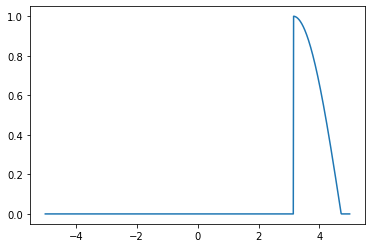

In [19]:
#задание 5.1, в pdf файле задание 5.2 и 5.3
import matplotlib.pyplot as plt
x = np.arange(-5, 5, 0.01)

def F(x):
    return 0 if x < np.pi else 0 if x > 3/2*np.pi else -np.cos(x)

plt.plot(x, np.array([F(y) for y in x]))

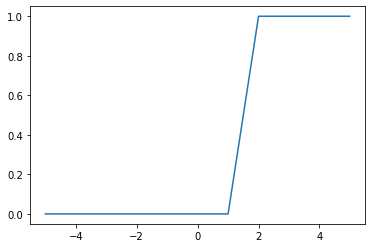

In [ ]:
#задание 5.3 (а)
x = np.arange(-5, 5, 0.01)

def F(x):
    return 0 if x <= 1 else 1 if x > 2 else x-1

plt.plot(x, np.array([F(y) for y in x]))

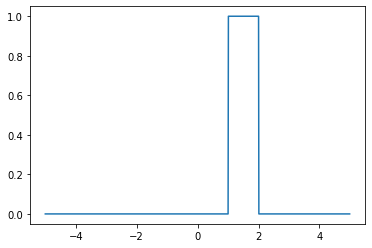

In [ ]:
#задание 5.3 (б), 5.1 и 5.2 в pdf файле.
x = np.arange(-5, 5, 0.01)

def F(x):
    return 1 if  1 < x <= 2 else 0

plt.plot(x, np.array([F(y) for y in x]))

In [ ]:
#задание 6 в pdf файле